# Part 1: Self Organizing Map (SOM) for Fraud Detection
  We have to come up with a list of people who could potentially cheated.

In [ ]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-py3-none-any.whl size=8595 sha256=7b00604043dccd814b8ec4676c238557ea30cbf9a8419fb6920fc91dd5c7990a
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built MiniSom


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Deep Learning/Credit_Card_Applications.csv")

In [ ]:
X = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values

## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

## Training SOM

In [ ]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)   
#x and y grid size, input_len: 14 attributes+customer id, sigma:radius, 
#learning_rate:this decides by how much the weights are updated during each iteration,
#decay_parameter: used to improve convergence
som.random_weights_init(X)
#randomly assigns weights onto our data
som.train_random(data = X, num_iteration = 100)
#telling our model to train fro that number of iterations

## Visualising

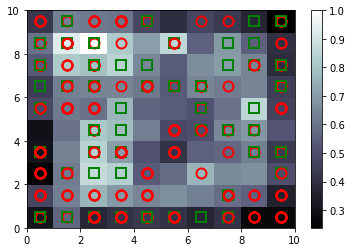

In [ ]:
#Mean Iterneuron Distance (MID)
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)      #Distance Map Method: som.distance_map(), .T() for transpose
colorbar()                        #Legend
markers = ['o', 's']    #shape of the marker
colors = ['r', 'g']     #color of the marker
for i, x in enumerate(X):
    w = som.winner(x)   #returns winning node
    plot(w[0] + 0.5,  w[1] + 0.5,   #by doing this we put marker at the centre of the square corresponding to the winning node
         markers[y[i]],   #customer got approved: y[i]=0 -> markers = 'o', customer didn't get approved:  y[i]=1-> markers = 's'
         markeredgecolor = colors[y[i]], #colors the edge, similar as above
         markerfacecolor = 'None', #because we can have markers for same BMU, if thats the case the two markers will be visible better
         markersize = 10,
         markeredgewidth = 2)
show()

#Positive Class: Green Square
#Negative Class: Red Circle
#bone(): creates a window where the map will be formed
#pcolor():put different winning nodes(BMU) on the map, info of MID for all winning nodes that SOM identified using colors

## Finding frauds

In [20]:
mappings = som.win_map(X)   #returns dictionary of all the mappings from the winning nodes to the customers 
frauds = np.concatenate((mappings[(5,3)], mappings[(8,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)

## Printing Fradulent Customers

In [21]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15767729
15711446
15787693
15688210
15704509
15793366
15735106
15688059
15683276
15652289
15642001
15768777
15791326
15779586
15730150
15777994
15585855
15661412
15697310
15799785
15591360
15649183
15766663
15592326
15671293
15602456
15697844
15728082
15675176
15580579
15768449
15665374
15740356


# Part 2: Unsupervised to Supervised

## Create Matrix Features

In [23]:
customers = data.iloc[:, 1:].values

In [24]:
#Creating dependent variable
is_fraud = np.zeros(len(data))
for i in range(len(data)):
  if data.iloc[i,0] in frauds:
    is_fraud[i] = 1

## Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Import Tensorflow

In [26]:
import tensorflow as tf
tf.__version__

'2.7.0'

## Initializing the ANN

In [27]:
ann = tf.keras.models.Sequential()

## Adding the input layer and the first hidden layer

In [28]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [29]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

### Compiling the ANN

In [30]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [32]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 50)

Epoch 1/50
690/690 [==============================] - 1s 2ms/step - loss: 0.1315 - accuracy: 0.9522
Epoch 2/50
690/690 [==============================] - 1s 2ms/step - loss: 0.1272 - accuracy: 0.9522
Epoch 3/50
690/690 [==============================] - 1s 1ms/step - loss: 0.1221 - accuracy: 0.9522
Epoch 4/50
690/690 [==============================] - 1s 1ms/step - loss: 0.1177 - accuracy: 0.9522
Epoch 5/50
690/690 [==============================] - 1s 1ms/step - loss: 0.1144 - accuracy: 0.9522
Epoch 6/50
690/690 [==============================] - 1s 1ms/step - loss: 0.1096 - accuracy: 0.9522
Epoch 7/50
690/690 [==============================] - 1s 1ms/step - loss: 0.1054 - accuracy: 0.9522
Epoch 8/50
690/690 [==============================] - 1s 1ms/step - loss: 0.1018 - accuracy: 0.9522
Epoch 9/50
690/690 [==============================] - 1s 1ms/step - loss: 0.0977 - accuracy: 0.9522
Epoch 10/50
690/690 [==============================] - 1s 1ms/step - loss: 0.0952 - accuracy: 0.9522

### Predicting test set results

In [33]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((data.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [34]:
print(y_pred)

[[1.57901130e+07 0.00000000e+00]
 [1.57627160e+07 2.83467065e-33]
 [1.55988020e+07 1.58092818e-29]
 ...
 [1.56522890e+07 7.00293720e-01]
 [1.56787790e+07 7.00293720e-01]
 [1.56973100e+07 7.00293720e-01]]
